In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt 
import pandas as pd 


In [3]:
training_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

In [4]:
#The Ticket colum is not necessary and doesn't give anything useful information so 
#dropping it
training_dataset.drop("Ticket",axis=1,inplace=True)
training_dataset.drop("PassengerId",axis=1,inplace=True)
test_dataset.drop("Ticket",axis=1,inplace=True)

In [5]:
#lets see for the corealtion between the items
cor_matrix = training_dataset.corr()
cor_matrix["Survived"].sort_values(ascending=False)


Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [6]:
#creating new columns like family size = SibSp+Parch
training_dataset["Family_size"] = training_dataset["SibSp"] + training_dataset["Parch"]
training_dataset["Fare_per_person"] = training_dataset['Fare'] / (training_dataset['Family_size']+1)

In [7]:
cor_matrix = training_dataset.corr()
cor_matrix['Survived'].sort_values(ascending=False)

Survived           1.000000
Fare               0.257307
Fare_per_person    0.221600
Parch              0.081629
Family_size        0.016639
SibSp             -0.035322
Age               -0.077221
Pclass            -0.338481
Name: Survived, dtype: float64

In [8]:
training_dataset["Embarked"].value_counts()
#most of the people get up from Southhampton so replacing all 
#Nan values in dataset of Embarked with S
training_dataset["Embarked"] = training_dataset["Embarked"].fillna('S')

In [9]:
def bar_chart(feature):
    survived = training_dataset[training_dataset['Survived']==1][feature].value_counts()
    not_survived = training_dataset[training_dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,not_survived])
    df.index=['Survived','Not_survived']
    df.plot(kind='bar',fig=(18,6),title=feature)

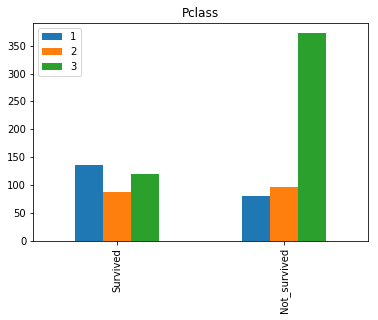

In [10]:
bar_chart("Pclass")

In [11]:
training_dataset["Cabin"].isna().sum()      #687
#There is 687 null values in the cabin and it won't give any useful information
#so decided to exclude this 
training_dataset.drop("Cabin",axis=1,inplace=True)

In [12]:
#Let's group people based on their class and their sex
class_sex_group = training_dataset.groupby(['Pclass','Sex'])


In [13]:
#I decided to replace Nan Age value with the median age of
#each group of Pclass and Sex 

median = class_sex_group["Age"].median()

In [14]:
#This is kind of overwhelming, I should have done using a loop or something like that
#but I cannot think of any way beside this
#improvement needed in this section
condtion1 = (training_dataset.Age.isna()) & (training_dataset.Pclass == 1) & (training_dataset.Sex == "female")
condtion2 = (training_dataset.Age.isna()) & (training_dataset.Pclass == 1) & (training_dataset.Sex == "male")
condtion3 = (training_dataset.Age.isna()) & (training_dataset.Pclass == 2) & (training_dataset.Sex == "female")
condtion4 = (training_dataset.Age.isna()) & (training_dataset.Pclass == 2) & (training_dataset.Sex == "male")

condtion5 = (training_dataset.Age.isna()) & (training_dataset.Pclass == 3) & (training_dataset.Sex == "female")
condtion6 = (training_dataset.Age.isna()) & (training_dataset.Pclass == 3) & (training_dataset.Sex == "male")



In [15]:
training_dataset.loc[condtion1,"Age"] = median[1][0]
training_dataset.loc[condtion2,"Age"] = median[1][1]
training_dataset.loc[condtion3,"Age"] = median[2][0]
training_dataset.loc[condtion4,"Age"] =median[2][1]
training_dataset.loc[condtion5,"Age"] = median[3][0]
training_dataset.loc[condtion6,"Age"] = median[3][1]

In [16]:
#All The Nan values have been replaced and there is no Nan Values
training_dataset.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Fare_per_person
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,3.62500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,35.64165
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,7.92500
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,26.55000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,8.05000
5,0,3,"Moran, Mr. James",male,25.0,0,0,8.4583,Q,0,8.45830
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0,51.86250
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4,4.21500
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,2,3.71110
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,1,15.03540


In [17]:
corr_matrix = training_dataset.corr()
corr_matrix["Survived"].sort_values(ascending = False)

Survived           1.000000
Fare               0.257307
Fare_per_person    0.221600
Parch              0.081629
Family_size        0.016639
SibSp             -0.035322
Age               -0.059579
Pclass            -0.338481
Name: Survived, dtype: float64

In [38]:
training_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Fare_per_person
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,3.62500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,35.64165
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,7.92500
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,26.55000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,8.05000


In [4]:
#drop name category for now
training_dataset.drop("Name",axis=1,inplace=True)


NameError: name 'training_dataset' is not defined

In [43]:
labels = training_dataset["Survived"]

In [45]:
training_dataset.drop("Survived",axis=1,inplace=True)

In [46]:
training_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Fare_per_person
0,3,male,22.0,1,0,7.2500,S,1,3.62500
1,1,female,38.0,1,0,71.2833,C,1,35.64165
2,3,female,26.0,0,0,7.9250,S,0,7.92500
3,1,female,35.0,1,0,53.1000,S,1,26.55000
4,3,male,35.0,0,0,8.0500,S,0,8.05000


In [54]:
#create a pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

training_dataset_num = training_dataset.drop(["Sex","Embarked"],axis=1)
num_attribute = list(training_dataset_num)
name_attri = ["Sex","Embarked"]




In [55]:
num_attribute

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_size', 'Fare_per_person']

In [56]:
full_pipeline = ColumnTransformer([
    ("std_scaler",StandardScaler(),num_attribute),
    ("cat",OneHotEncoder(),name_attri)
])

In [57]:
training_prepared = full_pipeline.fit_transform(training_dataset)

In [2]:
#checking decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [ ]:

#Using decision Tree Classifier:
dtc = DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
dtc.fit(training_prepared,labels)
result_decisionTree = cross_val_score(dtc,training_prepared,labels,scoring='accuracy',cv=10)
print("The accuray of the Decision Tree Classifire is:", round(scores.mean()*100,2))
pred = cross_val_predict(dtc,training_prepared,labels,cv=10)
sns.heatmap(confusion_matrix(labels,pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion  Matrix',y=1.05,size=15)

In [ ]:
#Random Forest Classifier
from sklearn.metrics import accuracy_score
rfc_model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
rfc_model.fit(training_prepared,labels)
pred = rfc_model.predict(training_prepared)
print("The accuracy of the Random FOrest is :",round(accuracy_score(labels,pred)*100,2))
rfc_score = cross_val_score(rfc_model,training_prepared,labels,scoring="accuracy",cv=10)
print("The cross validated score is:", round(rfc_score.mean()*100,2))
pred = cross_val_predict(rfc_model,training_prepared,labels,cv=10)
sns.heatmap(confusion_matrix(labels,pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion  Matrix',y=1.05,size=15)


